array([[<Axes: title={'center': 'x'}>, <Axes: title={'center': 'y'}>]],
      dtype=object)

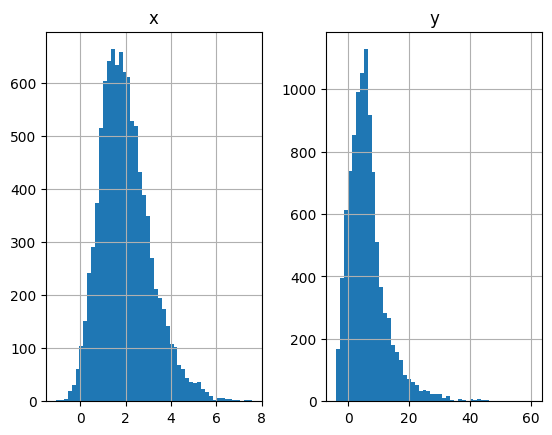

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# a continuación se intenta hace runa relación con cesgo
N=10**4 # Número de observaciones
normal=np.random.normal(size=(N,1))
gamma=np.random.gamma(shape=4, size=(N,1))
x=0.5*normal+0.5*gamma
y=x**2+1+np.random.uniform(-5,5,(N,1))
df=pd.DataFrame(np.concatenate((x,y),axis=1), columns=('x','y'))
df.hist(bins=50)

Discretización convertir variables numericas a categoricas, fácil e intuitivo (por ejemplo un promedio). Se entiende como discretización a la agrupación después de la codificación. 

Discretización de variables
Si necesitamos expresar un conjunto de valores por su valor central un solo valor nos puede representar varios, entre más valores más imprecisos. Si mi variable tiene un montón de observaciones y necesito un elemento que lo represente, una posible solución es hacer múltiples regresiones. 

Consiste en agrupar valores en conjuntos. A veces se usa para compensar sesfos dependiendo de como vas a hacer la discretización

Metodos:
Intervalos de ancho constante o fijo. 
Consiste en hacer divisiones como a mi me convenga, puede ser escala logarítmica o de forma caprichoza (Cómo me convenga)...
ej. discretizar una escala logarítmica o intervalos definidos (0-10, o 10-12, o 13-20) estos intervalos podrían convenirnos por alguna razón.

Discretizacion por frecuencia constante. 
Escoger cuantos datos quiero en un contenedor. 
Misma idea con número de elementos de una variable. 
Se puede escoger cuántas observaciones se quieren por cuartil. 



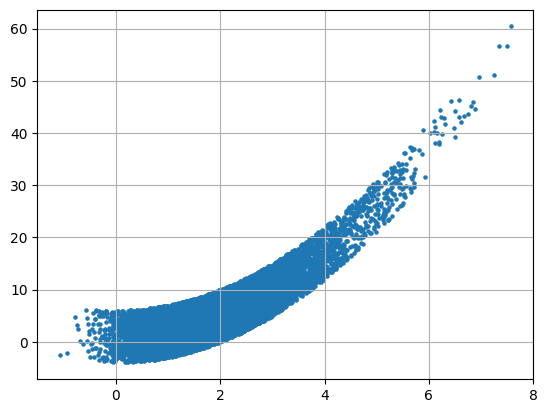

In [2]:
plt.scatter(df['x'], df['y'], s=5)
plt.grid()

# Ancho constante

In [4]:
# Rango entre el número de contenedores para saber qué paso voy a dar para cada contenedor (las divisiones)
bins=6
Max = df['x'].max()
Min = df['x'].min()
intervalo=(Max-Min) / bins
intervalo

1.440244690074023

In [5]:
# Límites del primer contendeor
Min, Min+intervalo


(-1.0715684858133252, 0.3686762042606977)

In [6]:
# Límites del segundo
Min+intervalo, Min+2*intervalo

(0.3686762042606977, 1.8089208943347206)

In [7]:
# en general los intervalos
np.arange(Min, Max+intervalo, intervalo)

array([-1.07156849,  0.3686762 ,  1.80892089,  3.24916558,  4.68941027,
        6.12965496,  7.56989965])

In [9]:
# Intervalos con linspace
intervalos = np.linspace(Min, Max, bins+1)
intervalos

array([-1.07156849,  0.3686762 ,  1.80892089,  3.24916558,  4.68941027,
        6.12965496,  7.56989965])

In [ ]:
# Dos formas para discretizar
# Primera argumento 1 variable que quieres discretizar, 2 número de contenedores o límites
# Segunda forma 1 bins, 2 limites de los intervalos que queremos


In [10]:
df['x_ancho'] = pd.cut(df['x'], intervalos, include_lowest=True)
df.head()

,x,y,x_ancho
0,1.115484,0.708710,"(0.369, 1.809]"
1,4.106082,19.376339,"(3.249, 4.689]"
2,1.355567,3.325659,"(0.369, 1.809]"
3,2.122408,2.850507,"(1.809, 3.249]"
4,3.049771,9.412231,"(1.809, 3.249]"


In [12]:
x=df.groupby('x_ancho')['x'].mean()

In [13]:
y=df.groupby('x_ancho')['y'].mean()

In [20]:
# Regresión de los datos sin discretizar
lin=LinearRegression()
lin.fit(df[['x']], df[['y']])
predict_sin_disc=lin.predict(df[['x']])

In [18]:
lin_ancho=LinearRegression()
lin_ancho.fit(x.values.reshape(-1,1), y)
predict_ancho=lin_ancho.predict(df[['x']])

c:\Users\anhernan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


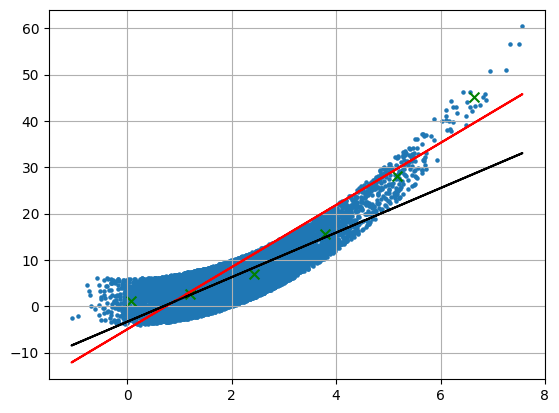

In [22]:
plt.scatter(df['x'], df['y'],s=5)
plt.plot(df['x'], predict_ancho, 'r', label='Regresión con datos discretizados') # Color red
plt.plot(df['x'], predict_sin_disc, 'k', label='Regresión sin discretizar')
plt.scatter(x.values,y.values, marker='x', c='g', s=50)
plt.grid()

In [23]:
# Por ancho constante varia cada rango, frecuencia constante sería más 
df['x_ancho'].value_counts()

(0.369, 1.809]     4331
(1.809, 3.249]     3939
(3.249, 4.689]     1069
(-1.073, 0.369]     437
(4.689, 6.13]       199
(6.13, 7.57]         25
Name: x_ancho, dtype: int64

# Frecuencia constante

In [26]:
# Se divide de acuerdo al número de observaciones
# Cada contenedor tiene la misma cantidad de observaciones
bins=6
n_quantile=np.round(df['x'].shape[0]/bins)
n_quantile

1667.0

In [29]:
df['x_freq'], limites_F=pd.qcut(df['x'], bins, retbins=True)
limites_F

array([-1.07156849,  0.96205508,  1.42123569,  1.86782248,  2.35498883,
        3.02391424,  7.56989965])

In [30]:
# Fijarse que cada rango tiene casi las mismas observaciones
df['x_freq'].value_counts()

(-1.073, 0.962]    1667
(0.962, 1.421]     1667
(1.868, 2.355]     1667
(3.024, 7.57]      1667
(1.421, 1.868]     1666
(2.355, 3.024]     1666
Name: x_freq, dtype: int64

In [34]:
x_F=df.groupby('x_freq')['x'].mean()
y_F=df.groupby('x_freq')['y'].mean()
x_F,y_F

(x_freq
 (-1.073, 0.962]    0.539054
 (0.962, 1.421]     1.200655
 (1.421, 1.868]     1.645177
 (1.868, 2.355]     2.101186
 (2.355, 3.024]     2.661736
 (3.024, 7.57]      3.849649
 Name: x, dtype: float64,
 x_freq
 (-1.073, 0.962]     1.496868
 (0.962, 1.421]      2.466168
 (1.421, 1.868]      3.879332
 (1.868, 2.355]      5.512415
 (2.355, 3.024]      7.927033
 (3.024, 7.57]      16.538647
 Name: y, dtype: float64)

In [35]:
lin_freq=LinearRegression()
lin_freq.fit(x_F.values.reshape(-1,1), y_F)
predict_freq=lin_freq.predict(df[['x']])

c:\Users\anhernan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


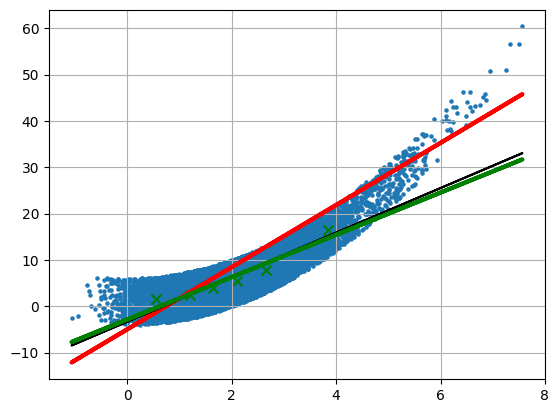

In [38]:
plt.scatter(df['x'], df['y'],s=5)
plt.plot(df['x'], predict_ancho, 'r', label='Discretización por ancho',lw=3) # Color red
plt.plot(df['x'], predict_sin_disc, 'k', label='Regresión sin discretizar') # Color black
plt.plot(df['x'], predict_freq, 'g', label='Discretización por frecuencia', lw=3) # Color green
plt.scatter(x_F.values,y_F.values, marker='x', c='g', s=50)
plt.grid()

<Axes: >

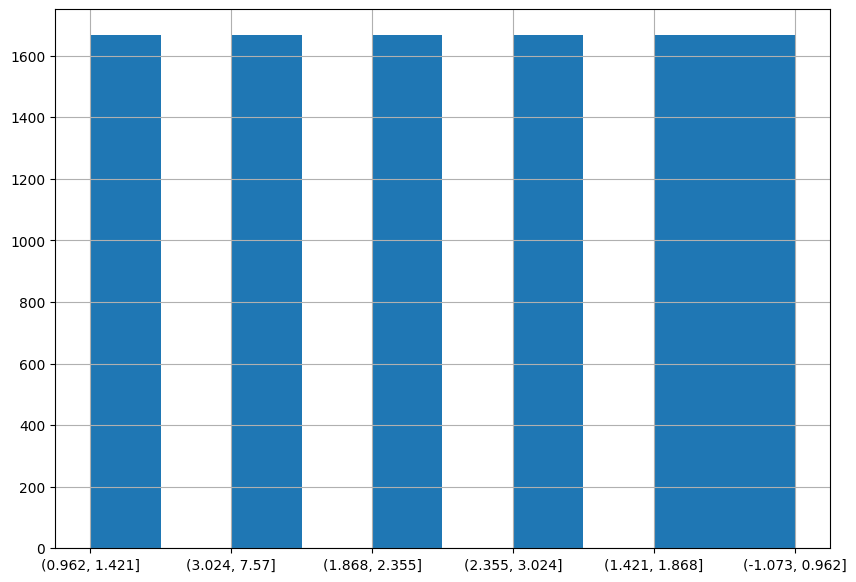

In [42]:
# La regresión por frecuencia casi no se altera como vemos, pero sí el histograma

df['x_freq'].astype('string').hist(figsize=(10,7))

<Axes: >

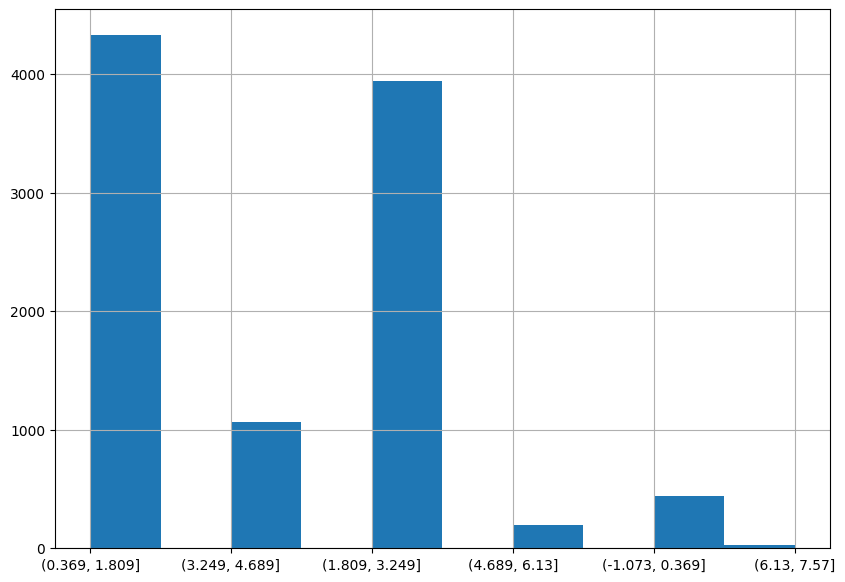

In [41]:
df['x_ancho'].astype('string').hist(figsize=(10,7))